In [1]:
!conda install matplotlib

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::seaborn==0.11.0=py_0
  - defaults/linux-64::anaconda==2020.11=py38_0
  - defaults/linux-64::bokeh==2.2.3=py38_0
  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/linux-64::anaconda-navigator==1.10.0=py38_0
  - defaults/linux-64::matplotlib==3.3.2=0
  - defaults/linux-64::matplotlib-base==3.3.2=py38h817c723_0
  - defaults/noarch::flask==1.1.2=py_0
  - defaults/linux-64::scikit-image==0.17.2=py38hdf5156a_0
  - defaults/linux-64::gevent==20.9.0=py38h7b6447c_0
  - defaults/noarch::dask==2.30.0=py_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [35]:
dfOvertime = pd.read_csv("OpenOvertime.csv")
dependent = json.load(open('../datasets/nq_open_test.json'))
dfOvertime['timely'] = dfOvertime['Question'].apply(lambda x: dependent[x])  

{'how many episodes in 1st season of the crown': False, 'when was the last time the carolina hurricanes made the playoffs': True, 'who has the oldest team in the nba': True, 'when was the last time america hosted the summer olympics': True, 'who sang the superbowl national anthem in 2017': False, 'who plays timon in lion king on broadway': False, 'when will the next episode of flash be aired': True, 'who has scored the most tries in rugby union': True, 'what color is the cue ball in pool': False, 'name three large lakes other than the great lakes in the united states': False, "when does grey's anatomy come back on in march": True, 'where was the capital of the habsburg empire located': False, 'wolf of wall street number of f words': False, 'where was the flag placed on the moon': False, 'how many students attend university of texas at austin': True, 'which country has won maximum number of gold medal in asian game 2014': False, 'when does the new gotham season come out': True, 'what ye

In [36]:
pd.set_option('display.max_colwidth', None)

In [37]:
#dfOvertime = dfOvertime.dropna()
dfOvertime

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,...,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely
0,0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, Soybeans, tobacco, barley, and oats","{'Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds': 'Agriculture in the United States', 'Soybeans': 'Agriculture in the United States', 'tobacco, barley, and oats': 'Agriculture in the United States'}",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.000000,...,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.0,True
1,1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,NaN,None,0.0,MGM Resorts International,Mandalay Bay,100.000000,...,MGM Resorts International,Mandalay Bay,60.653066,MGM Resorts,Mandalay Bay,50.0,MGM Mirage,Mandalay Bay,100.0,True
2,2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,NaN,None,-1.0,None,None,0.000000,...,The Elfstones,The Shannara Chronicles,-1.000000,None,None,25.0,"The Sword of Shannara"" trilogy of fantasy novels",The Shannara Chronicles,101.0,False
3,3,when did michigan last win a national championship,['1989'],Michigan Wolverines men's basketball,NaN,None,0.0,2013,Michigan Wolverines men's basketball,100.000000,...,2013,Michigan Wolverines men's basketball,100.000000,2013,Michigan Wolverines men's basketball,100.0,2013,Michigan Wolverines men's basketball,100.0,True
4,4,who owns the majority of the us debt,"['Japan and China', 'China', 'the public', 'Japan']",National debt of the United States,NaN,None,0.0,foreign investors,National debt of the United States,100.000000,...,foreign investors,National debt of the United States,0.000000,the public,National debt of the United States,100.0,the public,National debt of the United States,100.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1198,what country shares borders with both belarus and romania,['Ukraine'],State Border of Ukraine,NaN,None,0.0,Ukraine,State Border of Ukraine,100.000000,...,Ukraine,State Border of Ukraine,-1.000000,None,None,100.0,Ukraine,State Border of Ukraine,101.0,False
1199,1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,"one companion cell, companion cell, Sieve cells","{'one companion cell': 'Sieve tube element', 'companion cell': 'Sieve tube element', 'Sieve cells': 'Sieve tube element'}",100.0,companion cells,Sieve tube element,100.000000,...,companion cells,Sieve tube element,50.000000,parenchyma cells,Sieve tube element,100.0,parenchyma cells,Sieve tube element,50.0,False
1200,1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,"the central government, central government, Congress","{'the central government': 'Articles of Confederation', 'central government': 'Articles of Confederation', 'Congress': 'Articles of Confederation'}",100.0,Congress,Articles of Confederation,100.000000,...,the central government,Articles of Confederation,100.000000,central government,Articles of Confederation,100.0,Congress,Articles of Confederation,0.0,False
1201,1201,where was the new pete's dragon filmed,['New Zealand'],Pete's Dragon (2016 film),NaN,None,-1.0,None,None,0.000000,...,El Capitan Theatre,Pete's Dragon (2016 film),100.000000,El Capitan Theatre,Pete's Dragon 

In [5]:
dfOvertime = dfOvertime.mask(dfOvertime.eq('None')).dropna()

In [6]:
dfOvertime.sort_values("max - min").tail(100).sample(10)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
615,615,the recipient of first jnanpith award was an a...,['Malayalam'],Jnanpith Award,Malayalam,{'Malayalam': 'Jnanpith Award'},0.0,Bengali,Jnanpith Award,100.000000,...,100.000000,Malayalam,Jnanpith Award,100.0,Malayalam,Jnanpith Award,100.0,Malayalam,Jnanpith Award,100.0
876,876,when did the first battle of ypres end,['22 November 1914'],Battle of Ypres,four,{'four': 'Battle of Ypres'},0.0,five,Battle of Ypres,0.000000,...,100.000000,five,Battle of Ypres,100.0,five,Battle of Ypres,100.0,five,Battle of Ypres,100.0
619,619,what nba team did derrick rose play for,['Chicago Bulls'],Derrick Rose,Mean Street Express,{'Mean Street Express': 'Derrick Rose'},0.0,Chicago Bulls,Derrick Rose,100.000000,...,0.000000,Cleveland Cavaliers,Derrick Rose,0.0,Detroit Pistons,Derrick Rose,100.0,Detroit Pistons,Derrick Rose,100.0
653,653,what is the largest bill in american money,['$100'],Large denominations of United States currency,"gold certificates, U.S. dollar, $100,000",{'gold certificates': 'Large denominations of ...,100.0,U.S. dollar,Large denominations of United States currency,100.000000,...,0.000000,$100,Large denominations of United States currency,100.0,$100,Large denominations of United States currency,100.0,$100,Large denominations of United States currency,100.0
445,445,who has the most olympic medals in figure skating,"['Tessa Virtue', 'Canadian ice dancers Tessa V...",List of Olympic medalists in figure skating,1908 to 2006,{'1908 to 2006': 'List of Olympic medalists in...,0.0,Gillis Grafström (Sweden) and Evgeni Plushenko,List of Olympic medalists in figure skating,60.653066,...,16.666667,Sonja Henie (Norway) and Irina Rodnina,List of Olympic medalists in figure skating,100.0,Gillis Grafström,List of Olympic medalists in figure skating,100.0,Gillis Grafström,List of Olympic medalists in figure skating,100.0
32,32,who lasted the longest in the royal rumble,['Rey Mysterio'],Royal Rumble,"2002, Stone Cold Steve Austin, 15 wrestlers fr...","{'2002': 'Royal Rumble', 'Stone Cold Steve Aus...",0.0,Jim Duggan,Royal Rumble,33.333333,...,0.000000,Females,Royal Rumble,25.0,The winner of the event is the last wrestler r...,Royal Rumble,100.0,The winner,Royal Rumble,100.0
885,885,who sang the song oh what a lonely boy,['Andrew Gold'],Lonely Boy (Andrew Gold song),Linda Ronstadt,{'Linda Ronstadt': 'Lonely Boy (Andrew Gold so...,100.0,Linda Ronstadt,Lonely Boy (Andrew Gold song),100.000000,...,36.787944,Ronstadt,Lonely Boy (Andrew Gold song),0.0,Petula Clark,Lonely Boy (Andrew Gold song),0.0,Andrew Gold,Lonely Boy (Andrew Gold song),100.0
30,30,what type of bridge is the charles bridge,"['a bow bridge with 16 arches', 'bow bridge', ...",Charles Bridge,"historical, gothic, public transport","{'historical': 'Charles Bridge', 'gothic': 'Ch...",100.0,gothic,Charles Bridge,100.000000,...,100.000000,gothic,Charles Bridge,100.0,gothic,Charles Bridge,0.0,Gothic,Charles Bridge,100.0
722,722,who helped the british in the french and india...,"['the colonies of British America', 'Iroquois'...",French and Indian War,"Chief Hendrick, Spain, William Pitt","{'Chief Hendrick': 'French and Indian War', 'S...",0.0,Iroquois Six Nations,French and Indian War,100.000000,...,37.500000,Iroquois Six Nations and also by the Cherokees,French and Indian War,100.0,Iroquois Six Nations and also by the Cherokees,French and Indian War,100.0,Iroquois Six Nations and also by the Cherokees,French and Indian War,100.0
744,744,where does the water come from to fill lake eyre,['Warburton River'],Lake Eyre,"Local rain, monsoon","{'Local rain': 'Lake Eyre', 'monsoon': 'Lake E...",0.0,Warburton River,Lake Eyre,100.000000,...,100.000000,Warburton River,Lake Eyre,100.0,Warburton River,Lake Eyre,100.0,Warburton River,Lake Ey

In [38]:
dfGT = pd.read_csv("OpenGT.csv")
dfGT['timely'] = dfGT['Question'].apply(lambda x: dependent[x])  
dfGT = dfGT.dropna()
dfGT = dfGT.mask(dfGT.eq('None')).dropna()

In [39]:
dfGT.sort_values("max - min").tail(100).sample(10)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min,timely
209,209,how much money did the film titanic make,"['$2.187 billion', '$2.18 billion']",Titanic (1997 film),50.0,US$1.8 billion,Titanic (1997 film),100.0,$2.18 billion,Titanic (1997 film),...,over $1.84 billion,Titanic (1997 film),50.000000,$1.4 billion,Titanic (1997 film),0.000000,$18 million,Titanic (1997 film),100.0,True
638,638,what information is displayed in clear text from the ftp header,['all transmissions'],File Transfer Protocol,0.0,credentials and data,File Transfer Protocol,100.0,all transmissions,File Transfer Protocol,...,all transmissions,File Transfer Protocol,100.000000,all transmissions,File Transfer Protocol,100.000000,all transmissions,File Transfer Protocol,100.0,False
707,707,what written material is included in the talmud,"['the Mishnah', ""the Mishnah ( Hebrew : משנה , c. 200 CE ) , a written compendium of Rabbinic Judaism 's Oral Torah""]",Talmud,40.0,Mishnah and the Babylonian Gemara,Talmud,40.0,Mishnah and the Babylonian Gemara,Talmud,...,marginal glosses,Talmud,0.000000,marginal glosses,Talmud,0.000000,biblical exegesis and commentary on Tanakh,Talmud,100.0,False
966,966,who played junior on in the heat of the night,['Christian LeBlanc'],In the Heat of the Night (TV series),0.0,Carroll O'Connor,In the Heat of the Night (TV series),0.0,Joe Don Baker,In the Heat of the Night (TV series),...,Denise Nicholas,In the Heat of the Night (TV series),100.000000,Christian LeBlanc,In the Heat of the Night (TV series),100.000000,Christian LeBlanc,In the Heat of the Night (TV series),100.0,False
744,744,where does the water come from to fill lake eyre,['Warburton River'],Lake Eyre,0.0,Local rain,Lake Eyre,100.0,Warburton River,Lake Eyre,...,Warburton River,Lake Eyre,100.000000,Warburton River,Lake Eyre,100.000000,Warburton River,Lake Eyre,100.0,False
640,640,how much energy does coal produce in the us,"['30.4 %', '16.5 quadrillion BTUs']",Coal power in the United States,0.0,half,Coal power in the United States,100.0,16.5 quadrillion BTUs,Coal power in the United States,...,92.3%,Coal power in the United States,0.000000,224.3 GW,Coal power in the United States,0.000000,224.3 GW,Coal power in the United States,100.0,True
30,30,what type of bridge is the charles bridge,"['a bow bridge with 16 arches', 'bow bridge', 'a bow bridge', 'Stone']",Charles Bridge,0.0,historical,Charles Bridge,12.5,"solid-land"" connection made Prague important as a trade route between Eastern and Western Europe.\nThe bridge is 621 m long and nearly 10 m wide, resting on 16 arches shielded by ice guards",Charles Bridge,...,bow bridge,Charles Bridge,100.000000,bow bridge,Charles Bridge,100.000000,bow bridge,Charles Bridge,100.0,False
656,656,who does the voice of mickey mouse on mickey mouse clubhouse,"['Wayne Allwine', 'Wayne Allwine as Mickey Mouse and Martian Mickey ( 2006 - 09 )']",Mickey Mouse Clubhouse,0.0,They Might Be Giants,Mickey Mouse Clubhouse,0.0,Bobs Gannaway,Mickey Mouse Clubhouse,...,Bill Farmer,Mickey Mouse Clubhouse,100.000000,Wayne Allwine,Mickey Mouse Clubhouse,100.000000,Wayne Allwine,Mickey Mouse Clubhouse,100.0,False
948,948,who has the oldest team in the nba,"['New York Knickerbockers', 'Sacramento Kings']",National Basketball Association,0.0,Reebok,National Basketball Association,0.0,Los Angeles Lakers and San Antonio Spurs,National Basketball Association,...,New York Knicks,National Basketball Association,36.787944,Knickerbockers,National Basketball Association,33.333333,New Jersey Nets,National Basketball Association,100.0,True
658,658,when did movies start coming out in color,"['1895', 'introduced around 1940']",Color motion picture film,100.0,1895,Color motion picture film,0.0,1902,Color motion picture film,...,1902,Color motion picture film,0.000000,1902,Color mot

In [11]:
dfGT

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
0,0,what are the main crops grown in the united st...,['Corn'],Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, an...",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, an...",Agriculture in the United States,...,0.0,"fruits, vegetables, grains, and fiber crops",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, an...",Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, an...",Agriculture in the United States,0.000000
6,6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,...,0.0,Dallas Cowboys,San Francisco 49ers,0.000000,Dallas Cowboys,San Francisco 49ers,0.000000,Washington Redskins,San Francisco 49ers,0.000000
7,7,when was the south asian association for regio...,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,66.666667,"December 8, 1985",South Asian Association for Regional Cooperation,36.787944,1985,South Asian Association for Regional Cooperation,...,100.0,8 December 1985,South Asian Association for Regional Cooperation,100.000000,8 December 1985,South Asian Association for Regional Cooperation,100.000000,8 December 1985,South Asian Association for Regional Cooperation,63.212056
9,9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered...",Jaffa Cakes,100.000000,cakes,Jaffa Cakes,100.000000,cake,Jaffa Cakes,...,100.0,cake,Jaffa Cakes,100.000000,cake,Jaffa Cakes,100.000000,cake,Jaffa Cakes,0.000000
10,10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,50.000000,one week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,...,100.0,a week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,100.000000,a week,The Dark Side of the Moon,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1196,who is known as the super fast boy in the seri...,"['Dashiell Robert Parr / Dash', ""Dashiell Robe...",The Incredibles,1.831564,Dash,The Incredibles,0.000000,Mr. Incredible,The Incredibles,...,0.0,Mr. Incredible,The Incredibles,0.000000,Mr. Incredible,The Incredibles,1.831564,Dash,The Incredibles,1.831564
1197,1197,who won the battle of the first battle of bull...,"['Confederate forces', 'Confederate victory', ...",First Battle of Bull Run,0.000000,Jackson's 13,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,...,100.0,Confederate,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,100.000000,Confederate,First Battle of Bull Run,100.000000
1199,1199,name the cell which is attached to the lateral...,['sieve tube elements'],Sieve tube element,0.000000,one companion cell,Sieve tube element,6.896552,"sieve plates, pores in the plant cell walls th...",Sieve tube element,...,0.0,companion cells,Sieve tube element,0.000000,parenchyma cells,Sieve tube element,0.000000,parenchyma cells,Sieve tube element,6.896552
1200,1200,which government had more power under the arti...,"['the states', 'states']",Articles of Confederation,33.333333,the central government,Articles of Confederation,100.000000,the states,Articles of Confederation,...,100.0,the states,Articles of Confederation,33.333333,the central government,Articles of Confederation,33.333333,the central government,Articles of Confederation,66.666667


In [40]:
nqot = pd.read_csv("OpenOvertime.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").tail(100).sample(10)
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqst = nqot.filter(regex="Question|GT|2018|202")

In [41]:
nqst

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers,100.0,Washington Redskins,San Francisco 49ers
7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes,100.0,cake,Jaffa Cakes
10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,who is known as the super fast boy in the series the icredible,"['Dashiell Robert Parr / Dash', ""Dashiell Robert Parr / Dash , the Parrs ' second child""]",The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles,100.0,Mr. Incredible,The Incredibles
1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,100.0,Brig. Gen. Irvin McDowell,First Battle of Bull Run,100.0,McDowell,First Battle of Bull Run,100.0,McDowell,First Battle of Bull Run
1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,100.0,companion cells,Sieve tube element,50.0,parenchyma cells,Sieve tube element,100.0,parenchyma cells,Sieve tube element
1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,100.0,the central government,Articles of Confederation,100.0,central government,Articles of Confederation,100.0,Congress,Articles of Confederation


In [14]:
nqst.groupby("2021 Bleu Score").size().sort_values().tail(25)

2021 Bleu Score
47.768754       1
75.000000       1
62.500000       1
58.333333       1
57.142857       1
51.341712       1
90.909091       1
81.435368       1
42.857143       1
36.363636       1
31.250000       1
30.326533       1
22.222222       1
9.090909        1
39.770636       1
25.000000       2
66.666667       2
87.500000       3
33.333333       7
50.000000      13
0.000000       23
100.000000    438
dtype: int64

In [15]:
nqst.loc[nqst["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
0,what are the main crops grown in the united st...,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, an...",Agriculture in the United States
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,100.0,Dallas Cowboys,San Francisco 49ers
7,when was the south asian association for regio...,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered...",Jaffa Cakes,100.0,cake,Jaffa Cakes
10,how long was dark side of the moon number 1,"['42 : 49', 'a week']",The Dark Side of the Moon,100.0,a week,The Dark Side of the Moon
...,...,...,...,...,...,...
1195,what is the setting of the book hoot,"['Florida and into the town of Coconut Cove', ...",Hoot (novel),100.0,Florida,Hoot (novel)
1196,who is known as the super fast boy in the seri...,"['Dashiell Robert Parr / Dash', ""Dashiell Robe...",The Incredibles,100.0,Mr. Incredible,The Incredibles
1197,who won the battle of the first battle of bull...,"['Confederate forces', 'Confederate victory', ...",First Battle of Bull Run,100.0,Brig. Gen. Irvin McDowell,First Battle of Bull Run
1199,name the cell which is attached to the lateral...,['sieve tube elements'],Sieve tube element,100.0,companion cells,Sieve tube element


In [16]:
nqot.loc[2643]

KeyError: 2643

In [42]:
nqot = pd.read_csv("OpenGT.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").head(100).sample(10)
nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
nqot.loc[nqot["2018 Bleu Score"] == 0.0]
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Question,GT Answer,GT Topic,2008 Bleu Score,2014 Bleu Score,2016 Bleu Score,2018 Bleu Score,2020 Bleu Score,2021 Bleu Score,max - min,max bleu
158,who was the author of the art of war,"[""the ancient Chinese military strategist Sun Tzu ( `` Master Sun '' , also spelled Sunzi )"", 'attributed to the ancient Chinese military strategist Sun Tzu', 'Sun Tzu']",The Art of War,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
673,what new deal program limited production in industry,"['NIRA', 'National Industrial Recovery Act']",New Deal,50.000000,100.000000,50.000000,50.000000,100.000000,50.000000,50.000000,100.0
168,when was the miraculous journey of edward tulane published,"['March 30 , 2006', '2006']",The Miraculous Journey of Edward Tulane,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
668,the group that officially elects the president of the united states is called,"['the U.S. Electoral College', 'U.S. Electoral College']",United States presidential election,60.653066,60.653066,100.000000,100.000000,60.653066,60.653066,39.346934,100.0
667,who was the winner of the first indianapolis 500,['Ray Harroun'],List of Indianapolis 500 winners,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
682,when did the us stop trading with japan,"['1940', '1939']",Events leading to the attack on Pearl Harbor,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.0
664,who is the guy who walked across the twin towers,['Philippe Petit'],Philippe Petit,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
710,what was the name of the plant on little shop of horrors,['Audrey II'],Little Shop of Horrors (film),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
387,when did they stop making the nissan xterra,"['2015', 'after the 2015 model year']",Nissan Xterra,0.000000,0.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.0
756,who is the present rajya sabha speaker of india,['Venkaiah Naidu'],Rajya Sabha,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [18]:
nqot.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
23.076923       1
67.032005       1
58.410059       1
52.438111       1
40.000000       1
37.500000       1
34.227808       1
23.337955       1
92.596108       1
88.888889       1
22.222222       1
15.922918       1
14.893617       1
14.285714       1
92.004441       1
4.166667        1
11.156508       1
10.000000       1
0.819672        1
7.692308        1
6.000000        1
2.127660        1
4.347826        1
2.247191        1
4.000000        1
4.109589        1
75.000000       2
71.653131       2
51.341712       2
12.500000       2
28.571429       2
5.555556        2
18.393972       2
16.666667       2
22.313016       2
25.000000       3
23.884377       3
60.653066       3
20.000000       3
13.533528       3
47.768754       6
66.666667       7
33.333333       9
36.787944      12
50.000000      18
0.000000      173
100.000000    219
dtype: int64

In [19]:
accurate = nqot.loc[nqot["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")
len(accurate.loc[accurate["GT Topic"] == accurate["2018 Topic"]]) / len(accurate)

1.0

In [20]:
inaccurate = nqot.loc[nqot["2018 Bleu Score"] == 0.0].filter(regex="Question|GT|2018")
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(inaccurate)

1.0

In [21]:
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(nqot)

0.34393638170974156

In [22]:
inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]].sample(25)

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
153,who was the leader of the zulu in south africa...,"['Cetshwayo', 'Cetshwayo kaMpande']",Anglo-Zulu War,0.0,Ntshingwayo kaMahole Khoza,Anglo-Zulu War
366,who had won the first grammy award for the bes...,"['Chance the Rapper', 'Bobby Darin']",Grammy Award for Best New Artist,0.0,Milli Vanilli,Grammy Award for Best New Artist
534,who ran the fastest 40 yard dash in the nfl,"['John Ross', 'Jakeem Grant']",40-yard dash,0.0,"Jacoby Ford, who ran a 4.28 s in the 2010 NFL ...",40-yard dash
705,who played susanna in legends of the fall,['Julia Ormond'],Legends of the Fall,0.0,Aidan Quinn,Legends of the Fall
794,who are the australia's got talent judges,['Kelly Osbourne'],Australia's Got Talent,0.0,"Minogue, Burlinson and Symons",Australia's Got Talent
354,kings and queens of england in the 1900s,['Edward VII'],List of British monarchs,0.0,plantations,List of British monarchs
880,communities of similar organisms found in a pa...,"['habitat', 'species']",Habitat,0.0,biotope,Habitat
656,who does the voice of mickey mouse on mickey m...,"['Wayne Allwine', 'Wayne Allwine as Mickey Mou...",Mickey Mouse Clubhouse,0.0,Bill Farmer,Mickey Mouse Clubhouse
640,how much energy does coal produce in the us,"['30.4 %', '16.5 quadrillion BTUs']",Coal power in the United States,0.0,92.3%,Coal power in the United States
1017,when did this season of american idol start,"['March 11 , 2018']",American Idol,0.0,"January 17, 2006",American Idol


<AxesSubplot:>

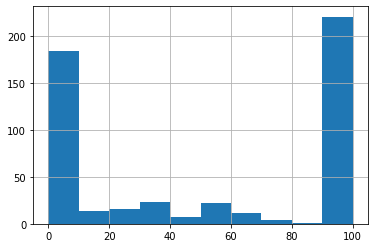

In [23]:
nqot.loc[nqot["GT Topic"] == nqot["2018 Topic"]]["2018 Bleu Score"].hist()

<AxesSubplot:>

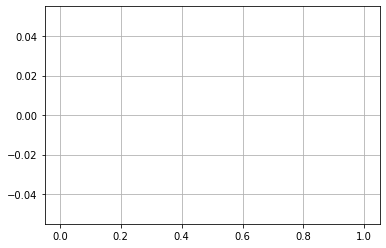

In [24]:
nqot.loc[nqot["GT Topic"] != nqot["2018 Topic"]]["2018 Bleu Score"].hist()

In [16]:
ost = pd.read_csv("NQOrigbBeuGT.csv")
ost = ost.dropna()
ost = ost.mask(ost.eq('None')).dropna()
ost.sort_values("max - min").head(100).sample(10)
#nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
#nqot.loc[nqot["2018 Bleu Score"] == 0.0]
# nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
1227,1227,who played in the first fifty shades of grey,['Dakota Johnson'],Fifty Shades of Grey (film),0.000000,Virginia Grey,Ray Grey,0.000000,James Dornan,Jamie Dornan,...,0.000000,Christian Grey,Jamie Dornan,0.000000,Christian Grey,Jamie Dornan,0.000000,Grant Michell,Grant Mitchell (actor),0.0
2911,2911,who are considered to be the founding fathers,"['John Adams , Benjamin Franklin , Alexander H...",Founding Fathers of the United States,100.000000,Thomas Jefferson and John Adams,Benjamin Rush,100.000000,James Madison and Alexander Hamilton,Founding Fathers of the United States,...,100.000000,James and John,Zebedee (disambiguation),100.000000,James and John,Zebedee (disambiguation),100.000000,James and John,Zebedee (disambiguation),0.0
1109,1109,how many episodes of corrie has there been,"['9,436']",Coronation Street,0.000000,94,Riverdale (TV series),0.000000,224,List of McLeod's Daughters episodes,...,0.000000,One hundred and twenty-eight,List of Dawson's Creek episodes,0.000000,One hundred and twenty-eight,List of Dawson's Creek episodes,0.000000,five,Blue Heelers,0.0
1344,1344,where is tigris river located on the world map,"[""38 ° 29 ′ 0 '' N 39 ° 25 ′ 0 '' E \ufeff / \...",Tigris,0.000000,southeast of Karachi,Indus River,0.000000,Turkey,List of tributaries of the Tigris,...,0.000000,Turkey,List of tributaries of the Tigris,0.000000,Dover,Tiber,0.000000,Turkey,List of tributaries of the Tigris,0.0
2957,2957,who talks for belle in beauty and the beast,"[""Paige O'Hara""]",Belle (Beauty and the Beast),100.000000,Paige O'Hara,Belle's Magical World,100.000000,Paige O'Hara,Something There,...,100.000000,Paige O'Hara,Belle (Disney),100.000000,Paige O'Hara,Paige O'Hara,100.000000,Paige O'Hara,Paige O'Hara,0.0
2898,2898,who said i'll gladly pay you tuesday,['Wimpy'],J. Wellington Wimpy,0.000000,Charlie Grimm,Bill Veeck,0.000000,Jay Leno,Rodney Dangerfield,...,0.000000,Walter Whisenhunt,Gloria Ann Taylor,0.000000,Walter Whisenhunt,Gloria Ann Taylor,0.000000,Walter Whisenhunt,Gloria Ann Taylor,0.0
1068,1068,what position did doug peterson play in the nfl,"['quarterback', 'a member of the Green Bay Pac...",Doug Pederson,0.000000,tight end,Doug Cosbie,0.000000,defensive back,Doug Terry,...,0.000000,defensive back,Doug Terry,0.000000,defensive back,Doug Terry,0.000000,running back,Doug DuBose,0.0
3040,3040,what is the meaning of adnan in hindi,['The person who has existence in two parallel...,Adnan (name),22.062423,the man who has won all his enemies,Arindam,22.062423,the man who has won all his enemies,Arindam,...,22.062423,the man who has won all his enemies,Arindam,22.062423,the man who has won all his enemies,Arindam,22.062423,the man who has won all his enemies,Arindam,0.0
1144,1144,when did they stop making pull tabs on beer cans,"['1990', '1970s']",Beverage can,0.000000,April 2006,Operation Last Call,0.000000,1960,Cone top,...,0.000000,1978,Billy Beer,0.000000,1978,Billy Beer,0.000000,1978,Billy Beer,0.0
2917,2917,what does v sign in front of mouth mean,"['cunnilingus', 'signify cunnilingus']",V sign,0.000000,victory,V sign,0.000000,victory,V sign,...,0.000000,water,Initialized sign,0.000000,"defiance (especially to authority), contempt, ...",V sign,0.000000,palm inward,V sign,0.0


In [22]:
ost.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
15.399514        1
20.018435        1
19.983114        1
19.722904        1
19.701513        1
              ... 
47.768754      109
33.333333      116
50.000000      183
0.000000      1120
100.000000    1518
Length: 426, dtype: int64

<AxesSubplot:>

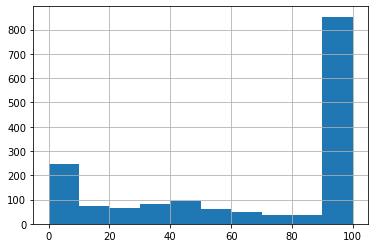

In [23]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [52]:
len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0]) / len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]])

0.650314465408805

<AxesSubplot:>

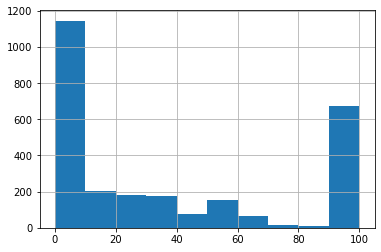

In [24]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [51]:
len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0]) / len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]])

0.2489811041126343

In [37]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018|max")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min
12,who plays peter in what we do in the shadows,['Ben Fransham'],What We Do in the Shadows,100.0,Ben Fransham,Ben Fransham,100.000000
15,when was the first hunger games book published,"['September 14 , 2008', '2008']",The Hunger Games (novel),100.0,2008,The Hunger Games,100.000000
29,who is recognized as the founder of islam,"['Muhammad', 'the Islamic prophet Muhammad']",History of Islam,100.0,Muhammad,Muhammad,0.000000
35,who is doing 2018 super bowl half time show,['Justin Timberlake'],Super Bowl LII halftime show,100.0,Justin Timberlake,Super Bowl LII,100.000000
42,who scored the most points in a single game in...,['Wilt Chamberlain'],List of National Basketball Association single...,100.0,Wilt Chamberlain,Double (basketball),0.000000
...,...,...,...,...,...,...,...
4255,what is the term of an official in the house o...,"['Representatives', 'two - year', 'Speaker of ...",United States House of Representatives,100.0,Speaker,Speaker of the United States House of Represen...,25.000000
4266,how many wins does tiger woods have on the pga...,['79'],List of career achievements by Tiger Woods,100.0,79,Tiger Woods,100.000000
4273,the first vice president of india who become t...,['Sarvepalli Radhakrishnan'],List of Vice-Presidents of India,100.0,Sarvepalli Radhakrishnan,Sarvepalli Radhakrishnan,100.000000
4275,who scored fastest 10000 runs in test cricket,"['Brian Lara', 'Alastair Cook']","List of players who have scored 10,000 or more...",100.0,Brian Lara,List of first-class cricket quadruple centuries,0.000000


In [45]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018|max").sort_values("2018 Bleu Score")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min
1411,votes required to pass a bill in indian parliament,['majority of members present at that time'],Lawmaking procedure in India,50.0,a simple majority of members present and voting,Lawmaking procedure in India,40.909091
1643,when was coffee first made into a drink,"['the 15th century', '15th century']",History of coffee,50.0,10th century,History of coffee,0.000000
908,where was the first season of slasher filmed,"['Orangeville , Ontario , Canada', 'Sudbury , Parry Sound , and Sault Ste . Marie , Ontario', 'Sudbury , Parry Sound']",Slasher (TV series),50.0,"Sudbury, Parry Sound, and Sault Ste. Marie, Ontario",Slasher (TV series),50.000000
2180,chemicals produced in one part of a plant that affect the growth and response of other parts,"['Plant hormones', 'hormones']",Plant hormone,50.0,Plant cells,Plant hormone,50.000000
882,what is the form of mozart symphony no 40,"['G minor', 'minor key symphonies']",Symphony No. 40 (Mozart),50.0,Great G minor symphony,Symphony No. 40 (Mozart),50.000000
...,...,...,...,...,...,...,...
1609,when did the movie breakfast club come out,"['February 15 , 1985', '1985']",The Breakfast Club,100.0,February 1985,The Breakfast Club,52.231246
1615,when did france and belgium invade the ruhr,"['11 January 1923', '1923', 'January 1923']",Occupation of the Ruhr,100.0,11 January 1923,Occupation of the Ruhr,100.000000
1616,what type of novel is goodbye mr chips,"['novella', 'Psychological fiction']","Goodbye, Mr. Chips",100.0,novella,"Goodbye, Mr. Chips",66.666667
1554,when did teenage mutant ninja turtles come out,['1984'],Teenage Mutant Ninja Turtles,100.0,1984,Teenage Mutant Ninja Turtles,100.000000


In [56]:
est = pd.read_csv("ElasticGT.csv")
est = est.dropna()
est = est.mask(est.eq('None')).dropna()
est.sort_values("max - min")

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
2179,2179,what type of business is chamber of commerce,"['a form of business network', 'a form of business network , for example , a local organization of businesses whose goal is to further the interests of businesses']",Chamber of commerce,100.000000,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,...,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,0.0
1774,1774,which country is the last member of saarc,['Afghanistan'],South Asian Association for Regional Cooperation,0.000000,Sri Lankan,South Asian Association for Regional Cooperation,0.0,Nepal,South Asian Association for Regional Cooperation,...,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0
3449,3449,who were farmers who kept a small portion of their crops & gave the rest to the landowners,['Sharecropping'],Sharecropping,0.000000,"Sharecrop farmers were loaned a plot of land to work, and in exchange owed the owner a share of the crop at the end of the season. Often the planter’s share was 1/3, though sometime it was much higher. The sharecropper was required to purchase seed, tools and fertilizer, as well as food and clothing, on credit at the plantation store. When the harvest came, the sharecrop farmer",Sharecropping,0.0,Sharecroppers,Sharecropping,...,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0
1768,1768,natural resources can be divided into what two categories,['Biotic'],Natural resource,0.000000,renewable and non-renewable resources,Natural resource,0.0,renewable or non-renewable,Natural resource,...,0.0,needs of future generations,Natural resource,0.0,"land, water, fisheries and pastoral rights",Natural resource,0.0,different ways,Natural resource,0.0
3444,3444,how many lines of symmetry are there in a equilateral triangle,"['3', '3 lines of reflection and rotational symmetry']",Equilateral triangle,100.000000,3,Equilateral triangle,100.0,3,Equilateral triangle,...,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,3197,a country having an island location and a country having continental location,['Australia'],List of island countries,0.000000,Micronesia,List of island countries,100.0,Australia,List of island countries,...,2.5,"Australia is designated as a continent, it is often referred to as an island, as it has no land borders. Some declared island countries are not universally recognized as politically independent, such as Northern Cyprus. Some states, such as Taiwan",List of island countries,100.0,Australia,List of island countries,100.0,Australia,List of island countries,100.0
3204,3204,what grade was arnold from hey arnold in,['fourth'],Hey Arnold!,0.000000,4th,Hey Arnold!,100.0,fourth,Hey Arnold!,...,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0
1245,1245,who plays jack skellington in nightmare before christmas,['Chris Sarandon'],Jack Skellington,0.000000,Sally,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,...,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0
3180,3180,why was the plague that struck athens so devastating,['close quarters and poor hygiene'],Plague of Athens,42.857143,poor hygiene habits and public sanitation conditions,Plague of Athens,0.0,no one could recall anywhere its like,P

In [64]:
len(est.loc[est["GT Topic"] == est["2018 Topic"]])

2150

In [59]:
est.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
15.922918       1
18.750000       1
18.887560       1
19.470020       1
19.983114       1
             ... 
36.787944      32
33.333333      37
50.000000      65
0.000000      590
100.000000    804
Length: 297, dtype: int64

<AxesSubplot:>

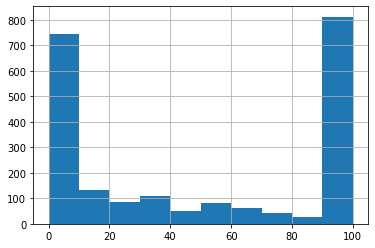

In [60]:
est.loc[est["GT Topic"] == est["2018 Topic"]]["2018 Bleu Score"].hist()

In [70]:
est.loc[est["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
6,where was the world economic forum held this year,"['Davos , a mountain resort in Graubünden , in the eastern Alps region of Switzerland', 'Davos']",World Economic Forum,100.000000,Davos,World Economic Forum
18,where did the race in grease take place,"['the Los Angeles River , between the First and Seventh Street Bridges', 'at the Los Angeles River , between the First and Seventh Street Bridges', 'Thunder Road']",Grease (film),100.000000,Los Angeles River,Grease (film)
21,a good that can be used in place of another good,"['A substitute good', 'substitute good']",Substitute good,100.000000,substitute good,Substitute good
31,how old was sasuke when his clan died,['seven'],Sasuke Uchiha,100.000000,seven,Sasuke Uchiha
34,who is the pastor of new birth missionary baptist church now,"['Stephen A. Davis', 'Stephen A. Davis , pastor of New Birth Birmingham in Birmingham , Alabama']",New Birth Missionary Baptist Church,100.000000,Stephen A. Davis,New Birth Missionary Baptist Church
...,...,...,...,...,...,...
4230,how long is one full rotation of the earth,"['about 24 hours with respect to the Sun , but once every 23 hours , 56 minutes , and 4 seconds with respect to the stars', 'about 24 hours']",Earth's rotation,80.000000,once in about 24 hours,Earth's rotation
4247,what is the meaning of molech in the bible,"['biblical name of a Canaanite god associated with child sacrifice', 'king', 'a Canaanite god associated with child sacrifice', 'the biblical name of a Canaanite god associated with child sacrifice']",Moloch,67.032005,the name of a god,Moloch
4249,who wrote the song fly me to the moon,['Bart Howard'],Fly Me to the Moon,100.000000,Bart Howard,Fly Me to the Moon
4278,when was the first driver's license required,"['1888', '1 January 1904 after the Motor Car Act 1903 received royal assent in the United Kingdom', '1 January 1904']",Driver's license,100.000000,1 January 1904,Driver's license


In [71]:
1026/len(est)

0.4772093023255814